In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create Latitude and Longitude Combinations
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import Citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)
#
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters.
record_count = 1
set_count = 1

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | gap
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | atchison
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | yuli
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | filadelfia
Processing Record 19 of Set 1 | nepomuk
Processing Record 20 of Set 1 | saint pete beach
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | georgetown
Processing Recor

City not found. Skipping...
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | kita
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | houston
Processing Record 43 of Set 4 | ghanzi
Processing Record 44 of Set 4 | sakata
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | sumbe
Processing Record 47 of Set 4 | monrovia
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | navahrudak
Processing Record 50 of Set 4 | kendari
Processing Record 1 of Set 5 | antalaha
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | along
Processing Record 6 of Set 5 | poya
Processing Record 7 of Set 5 | asau
Processing Record 8 of Set 5 | lopare
Processing Record 9 of Set 5 | saint-leu
Processing Record 10 of Set 5 | okandja
City not found. Skipping...
Processing Record 11 of Set 5 | avera
Processing Record 12 of Set 5 | skjaerh

Processing Record 27 of Set 8 | upernavik
Processing Record 28 of Set 8 | abu zabad
Processing Record 29 of Set 8 | flin flon
Processing Record 30 of Set 8 | guanare
Processing Record 31 of Set 8 | marawi
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | geraldton
Processing Record 34 of Set 8 | bay-khaak
Processing Record 35 of Set 8 | antioquia
Processing Record 36 of Set 8 | verkhnevilyuysk
Processing Record 37 of Set 8 | inirida
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | msanga
Processing Record 40 of Set 8 | jinxiang
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | hearst
Processing Record 45 of Set 8 | airai
Processing Record 46 of Set 8 | teguldet
Processing Record 47 of Set 8 | dalianwan
Processing Record 48 of Set 8 | shache
Processing Record 49 of Set 8 | maragogi
Processing Record 50 of Set 8 | olafsvik
Pro

Processing Record 17 of Set 12 | nome
Processing Record 18 of Set 12 | mogadishu
Processing Record 19 of Set 12 | areka
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | salym
Processing Record 22 of Set 12 | salta
Processing Record 23 of Set 12 | mocuba
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | makakilo city
Processing Record 26 of Set 12 | boa vista
Processing Record 27 of Set 12 | salinopolis
Processing Record 28 of Set 12 | araouane
Processing Record 29 of Set 12 | kalmar
Processing Record 30 of Set 12 | karaul
City not found. Skipping...
Processing Record 31 of Set 12 | ocos
Processing Record 32 of Set 12 | lafiagi
Processing Record 33 of Set 12 | saint-denis
Processing Record 34 of Set 12 | verdun
Processing Record 35 of Set 12 | rafai
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | erzin
Processing Record 38 of Set 12 | marquette
Processing Record 39 of Set 12 | yandoon
City not found. Skippin

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coihaique,-45.5752,-72.0662,40.95,52,20,4.61,CL,2022-09-17 15:47:13
1,Punta Arenas,-53.1500,-70.9167,46.51,42,0,20.71,CL,2022-09-17 15:44:55
2,Bluff,-46.6000,168.3333,42.37,83,97,7.27,NZ,2022-09-17 15:47:13
3,Albany,42.6001,-73.9662,64.31,64,100,2.01,US,2022-09-17 15:43:56
4,Busselton,-33.6500,115.3333,51.15,89,20,4.99,AU,2022-09-17 15:47:14
5,Gap,44.6667,6.0000,47.73,39,0,9.86,FR,2022-09-17 15:47:14
6,Rikitea,-23.1203,-134.9692,72.59,74,0,18.95,PF,2022-09-17 15:47:15
7,Atchison,39.5630,-95.1216,79.32,87,80,11.18,US,2022-09-17 15:47:15
8,Hilo,19.7297,-155.0900,83.28,80,40,6.91,US,2022-09-17 15:45:32
9,Cape Town,-33.9258,18.4232,59.41,66,75,11.50,ZA,2022-09-17 15:47:16


In [13]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order] 
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
540,Rafai,CF,2022-09-17 16:01:41,4.9500,23.9167,72.00,94,85,4.21
541,Kudahuvadhoo,MV,2022-09-17 16:01:41,2.6708,72.8944,81.99,68,78,5.64
542,Erzin,TR,2022-09-17 16:01:42,36.9559,36.2000,77.97,76,0,4.99
543,Marquette,US,2022-09-17 16:01:42,46.5333,-87.6335,74.82,85,60,9.17
544,Baymak,RU,2022-09-17 16:01:42,52.5933,58.3225,54.57,96,100,7.70
545,Terrace,CA,2022-09-17 16:01:43,54.5163,-128.6035,47.73,92,81,1.28
546,Poum,NC,2022-09-17 16:01:43,-20.2333,164.0167,74.16,71,0,16.98
547,Omboue,GA,2022-09-17 16:01:43,-1.5746,9.2618,77.90,74,86,10.96
548,Marystown,CA,2022-09-17 16:01:44,47.1666,-55.1483,57.81,65,64,23.89
549,Moree,AU,2022-09-17 16:01:44,-29.4667,149.8500,49.55,61,2,7.20


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

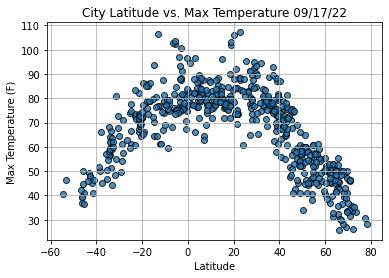

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

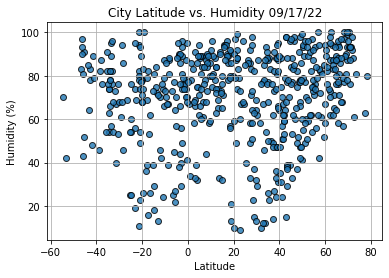

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

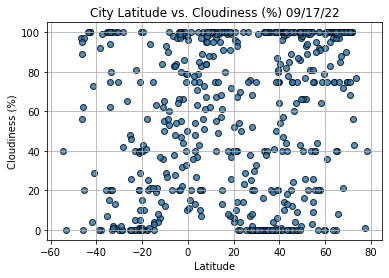

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

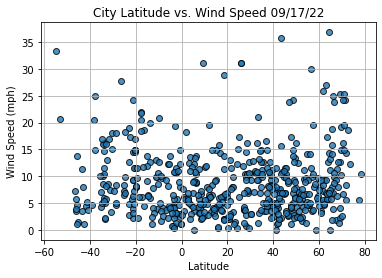

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Albany,US,2022-09-17 15:43:56,42.6001,-73.9662,64.31,64,100,2.01
5,Gap,FR,2022-09-17 15:47:14,44.6667,6.0000,47.73,39,0,9.86
7,Atchison,US,2022-09-17 15:47:15,39.5630,-95.1216,79.32,87,80,11.18
8,Hilo,US,2022-09-17 15:45:32,19.7297,-155.0900,83.28,80,40,6.91
10,Yuli,NG,2022-09-17 15:47:16,9.6989,10.2744,76.86,80,99,2.59


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

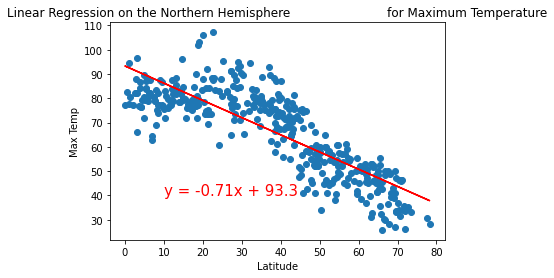

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

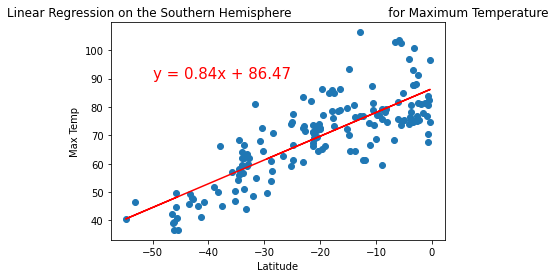

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# How to find the r-values of the plots


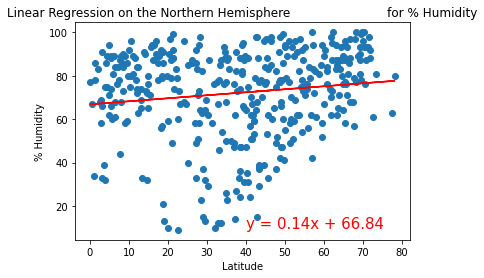

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

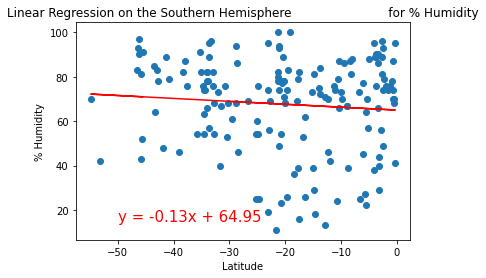

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# How to find the r-values of the plots


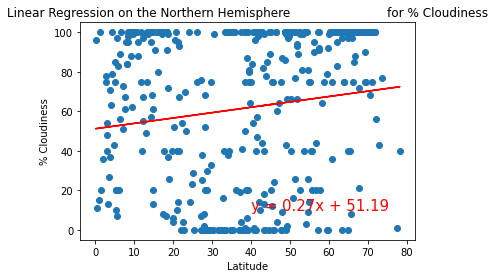

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

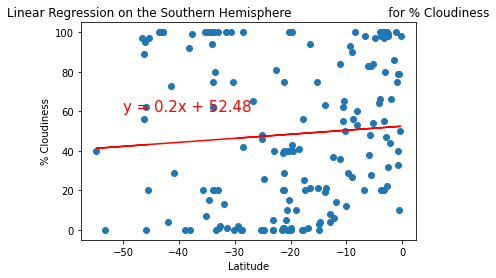

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# How to find the r-values of the plots

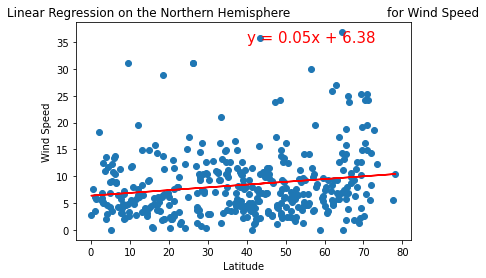

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

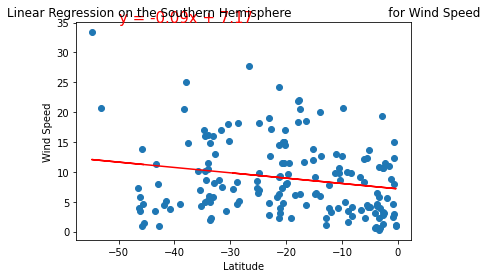

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))